# Soumadeep Bhowmick

# Data Science and Business Analytics Intern, GRIP October 2021 batch

# GRIP @ THE SPARKS FOUNDATION

# TASK 01: Prediction using Supervised ML


Objective: To predict the percentage scores obtained by a student based on the number of study hours using Simple Linear Regression.

# Importing the dataset

In [24]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [7]:
#reading the data set
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

# Understanding the dataset

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.shape

(25, 2)

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Data Visualization
we visualize the data using matplotlib.pyplot library

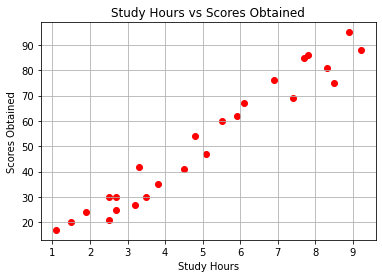

In [14]:

plt.scatter(df.Hours,df.Scores,color="red")
plt.xlabel("Study Hours")
plt.ylabel("Scores Obtained")
plt.title("Study Hours vs Scores Obtained")
plt.grid()
plt.show()

In [15]:
#calculating spearman's rank correlation coefficient
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [16]:
#calculating pearsonian correlation coefficient
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation & Splitting

In [44]:
x=df.iloc[:,:1]
y=df.iloc[:,1:]

In [45]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [46]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [111]:
#Splitting the data into traing data and testing data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)

# Training the model

Now, we will fit a simple linear regression model to the training dataset by using LinearRegression() from sklearn.linear_model library.Then we will obtain the regression line and plot the regression line fitted on the data.


In [112]:
from sklearn.linear_model import LinearRegression
m= LinearRegression()
m.fit(train_x,train_y)
predicted_y= model.predict(train_x)

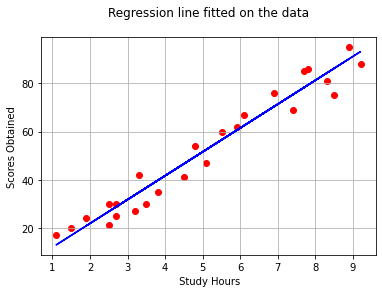

In [113]:
#plotting for the training data
rgline= m.coef_*train_x+ m.intercept_
plt.scatter(x,y,color="red")
plt.plot(train_x,rgline,color="blue")
plt.title("Regression line fitted on the data\n")
plt.xlabel(" Study Hours")
plt.ylabel("Scores Obtained")
plt.grid()
plt.show()

# Comparison between predicted and observed values :


In [126]:
test_y_a=test_y.to_numpy()
y_pred= m.predict(test_x)
diff=test_y_a-y_pred
df_comparison=pd.DataFrame(diff)

df_comparison



,0
0,3.115855
1,-6.732261
2,-6.357018
3,3.205199
4,1.508967


C:\Users\Soumadeep\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


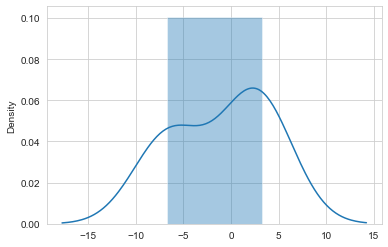

In [133]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(np.array(diff))
plt.show()

# Model Evaluation


In this stage, we will check the goodness of fit of the model using Mean Squared Error, Mean Absolute Error and R squared values. For a good model, the Mean Squared Error and Mean Absolute Error should be minimum and the R Squared values for the training set and testing set should be as close as possible to each other. 

In [142]:
from sklearn import metrics
#Mean Squared Error
print("Mean Squared Error:",metrics.mean_squared_error(test_y,y_pred))
#Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(test_y,y_pred))
#R squared score for the training set
print("R squared score for the training set :",model.score(train_x,train_y))
#R squared score for the testing set
print("R squared score for the testing set :",model.score(test_x,test_y))



Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
R squared score for the training set : 0.9479102220548283
R squared score for the testing set : 0.9302872211431924


# Prediction of the percentage score of a student who studies for 9.25 hours/day

In [146]:
print("The Expected percentage score of a student who studies for 9.25 hours/day is",m.predict([[9.25]]))

The Expected percentage score of a student who studies for 9.25 hours/day is [[93.69173249]]


Here we fitted the best fit linear model and evaluated the model to check it's goodness of fit.We obtained  93.02% R squared value for the testing dataset which is an excellent score. We predictedfrom the fitted model that a student studying for 9.25hours/day is expected to score 93.69%.

# Thank You